<h1><center><b>CHURN RISK PREDICTION</b></center></h1>

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

In [2]:
data = pd.read_csv("data.csv")
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


## Exploratory Data Analysis

In [3]:
data.shape

(36992, 25)

In [4]:
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
numerical_cols = [feature for feature in data.columns if data[feature].dtype != "O"]

print(f"{len(categorical_cols)} features are categorical type: ", categorical_cols)
print(f"{len(numerical_cols)} features are numerical : ",numerical_cols)

19 features are categorical type:  ['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
6 features are numerical :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
# customer_id
print(f"Missing values: {data['customer_id'].isnull().sum()}")
print(f"Unique values: {data['customer_id'].nunique()}")

Missing values: 0
Unique values: 36992


In [7]:
# Name
print(f"Missing values: {data['Name'].isnull().sum()}")
print(f"Unique values: {data['Name'].nunique()}")

Missing values: 0
Unique values: 36992


In [8]:
# age
print(f"Missing values: {data['age'].isnull().sum()}")
print(f"Unique values: {data['age'].nunique()}")

Missing values: 0
Unique values: 55


In [9]:
data['age'].unique()

array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
       33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
       58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
       46, 15, 64, 63], dtype=int64)

<Axes: xlabel='age', ylabel='count'>

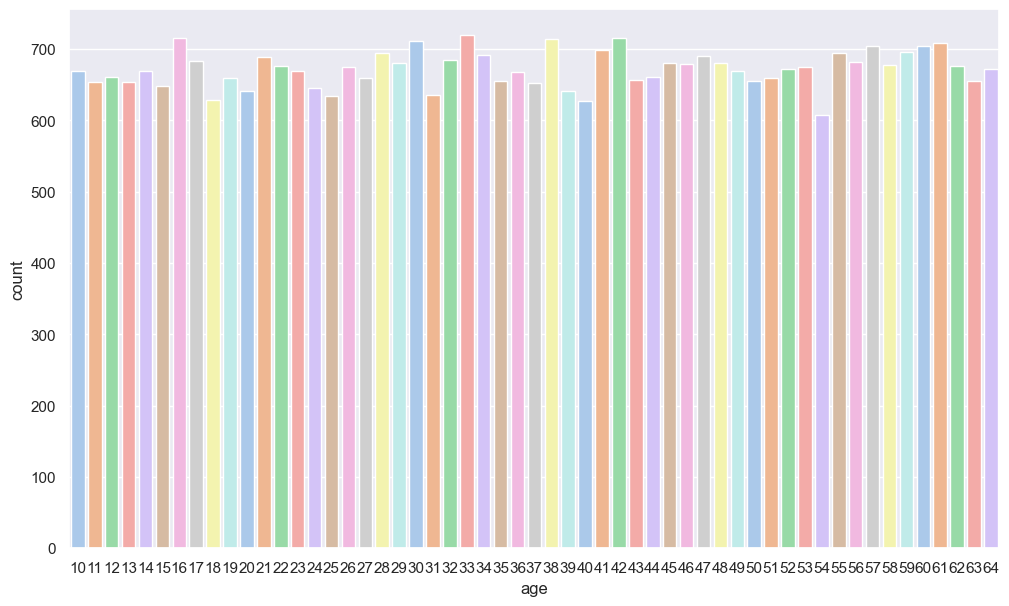

In [10]:
sns.set(rc = {'figure.figsize':(12,7)})
color = sns.color_palette("pastel")
sns.countplot(x = data['age'], data = data, palette = color)

- The age range is from 10 - 64 years old
- The data set divided by age is quite nice and even, each age group has from 600 - 700 data samples.

In [11]:
# gender
print(f"Missing values: {data['gender'].isnull().sum()}")
print(f"Unique values: {data['gender'].unique().tolist()}")
print(data['gender'].value_counts())

Missing values: 0
Unique values: ['F', 'M', 'Unknown']
gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64


- The column '__gender__' has data __Unknown__ accounting for 59/36992 of the total amount of data, this proves that the value __Unknown__ is considered missing values and must be handled.
- Searching the data set to determine the gender of customers whose __Unknown__ value is a male or female name, then make changes to the corresponding value.


<Axes: xlabel='gender', ylabel='count'>

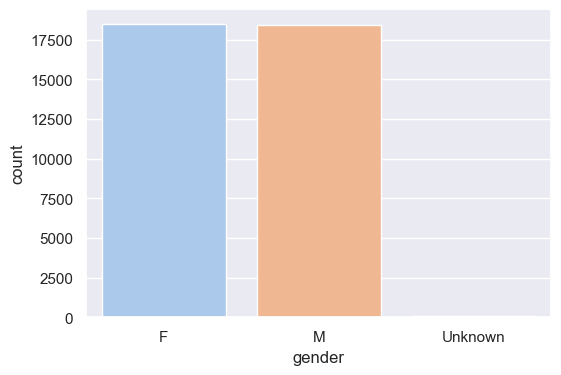

In [12]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['gender'], data = data, palette = color)

In [13]:
# security_no
print(f"Missing values: {data['security_no'].isnull().sum()}")
print(f"Unique values: {data['security_no'].nunique()}")

Missing values: 0
Unique values: 36992


In [14]:
# region_category
print(f"Missing values: {data['region_category'].isnull().sum()}")
print(f"Unique values: {data['region_category'].unique().tolist()}")
print(data['region_category'].value_counts())

Missing values: 5428
Unique values: ['Village', 'City', 'Town', nan]
region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64


There are 5428 missing values in the column '__region_category__' , filling in the missing values with the __mode__ of that column.

<Axes: xlabel='region_category', ylabel='count'>

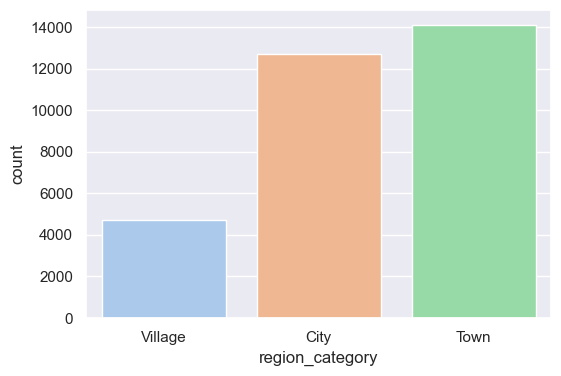

In [15]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['region_category'], data = data, palette = color)

In [16]:
# membership_category
print(f"Missing values: {data['membership_category'].isnull().sum()}")
print(f"Unique values: {data['membership_category'].unique().tolist()}")
print(data['membership_category'].value_counts())

Missing values: 0
Unique values: ['Platinum Membership', 'Premium Membership', 'No Membership', 'Gold Membership', 'Silver Membership', 'Basic Membership']
membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64


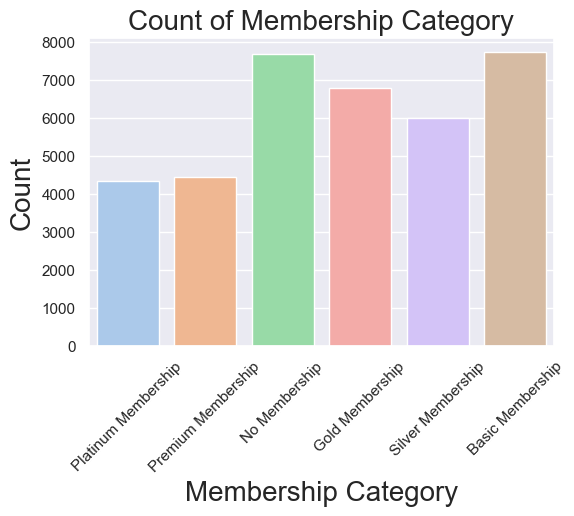

In [17]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['membership_category'], data = data, palette = color)
xsticks = plt.xticks(rotation = 45)
xlabel = plt.xlabel("Membership Category", fontsize = 20)
ylabel = plt.ylabel("Count", fontsize = 20)
title = plt.title("Count of Membership Category", fontsize = 20)


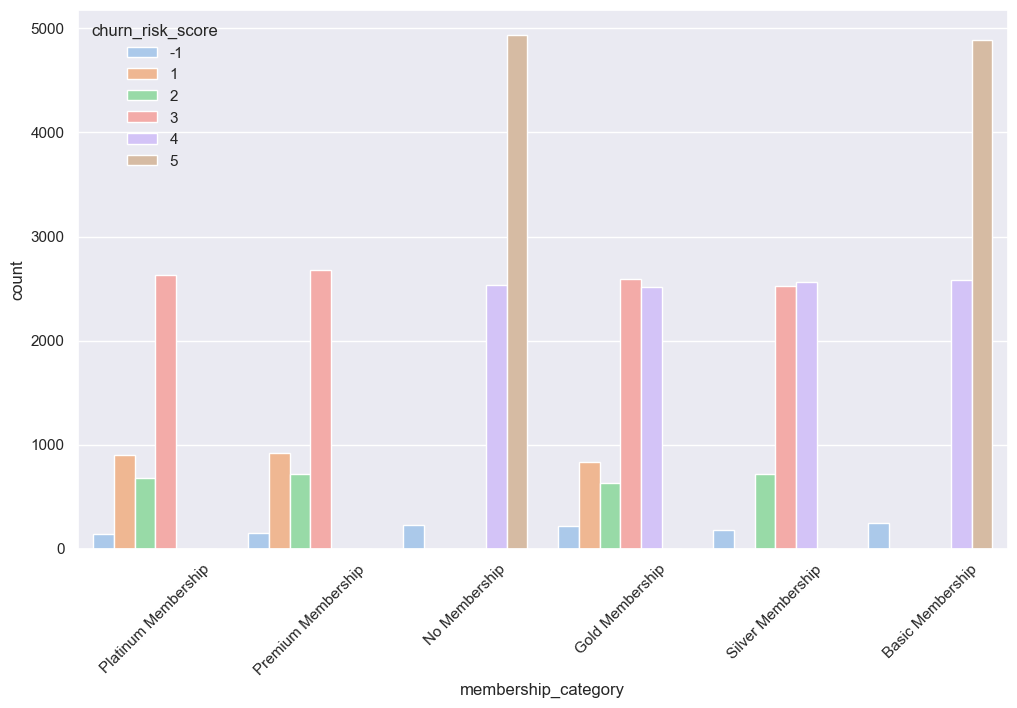

In [18]:
plt.figure(figsize = (12, 7))
color = sns.color_palette("pastel")
sns.countplot(x = data['membership_category'], hue = data['churn_risk_score'], palette = color)
xsticks = plt.xticks(rotation = 45)
plt.show()

Customers with lower ratings will have a higher churn rate because perhaps their need to use the website is not high, and their frequency of using the website is low.

In [19]:
# joining_date
print(f"Missing values: {data['joining_date'].isnull().sum()}")
print(f"Unique values: {data['joining_date'].nunique()}")

Missing values: 0
Unique values: 1096


In [20]:
# joined_through_referral (shows if the customer joined via any referral code or id)
print(f"Missing values: {data['joined_through_referral'].isnull().sum()}")
print(f"Unique values: {data['joined_through_referral'].unique().tolist()}\n")
print(data['joined_through_referral'].value_counts())

Missing values: 0
Unique values: ['No', '?', 'Yes']

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64


<Axes: xlabel='joined_through_referral', ylabel='count'>

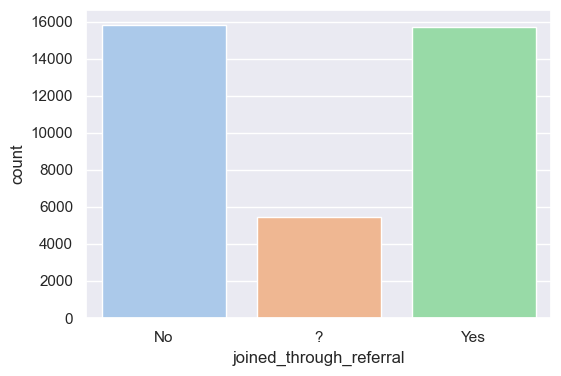

In [21]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['joined_through_referral'], data = data, palette = color)

In [22]:
# referral_id (represents the id or referral code if the client joined via referral code used)
print(f"Missing values: {data['referral_id'].isnull().sum()}")
print(f"Unique values: {data['referral_id'].nunique()}\n")
print(data['referral_id'].value_counts())

Missing values: 0
Unique values: 11359

referral_id
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: count, Length: 11359, dtype: int64


In [23]:
# preferred_offer_types (Shows the type of incentives customers prefer.)
print(f"Missing values: {data['preferred_offer_types'].isnull().sum()}")
print(f"Unique values: {data['preferred_offer_types'].unique().tolist()}\n")
print(data['preferred_offer_types'].value_counts())

Missing values: 288
Unique values: ['Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers', nan]

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64


'__preferred offer_types__' has 288 missing values. Fill in the missing values with the most frequently occurring values (mode) of that data column

<Axes: xlabel='preferred_offer_types', ylabel='count'>

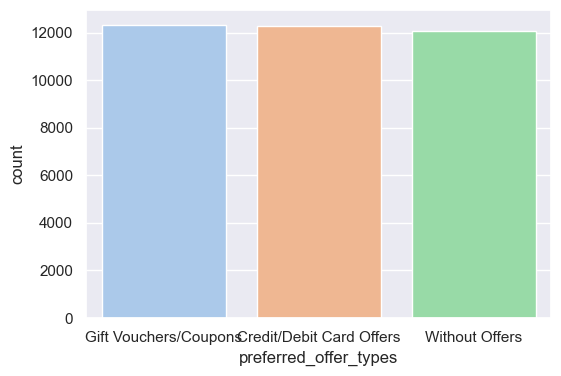

In [24]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['preferred_offer_types'], data = data, palette = color)

<Axes: >

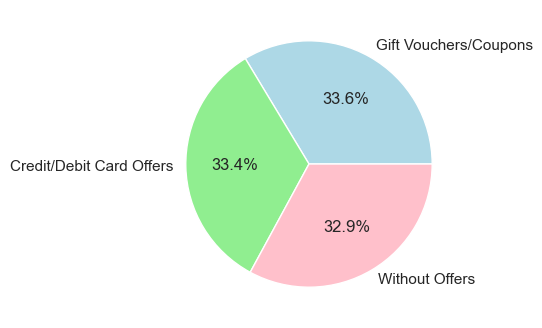

In [25]:
data['preferred_offer_types'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "", figsize = (6, 4), colors = ['lightblue', 'lightgreen', 'pink'])

In [26]:
# medium_of_operation (represents the device that customers use to transact)
print(f"Missing values: {data['medium_of_operation'].isnull().sum()}")
print(f"Unique values: {data['medium_of_operation'].unique().tolist()}\n")
print(data['medium_of_operation'].value_counts())

Missing values: 0
Unique values: ['?', 'Desktop', 'Smartphone', 'Both']

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64


This column '__medium_of_operation__' does not have missing data but there are data fields that are __?__, so this __?__ data is also considered a form of missing values that needs to be handled.

<Axes: xlabel='medium_of_operation', ylabel='count'>

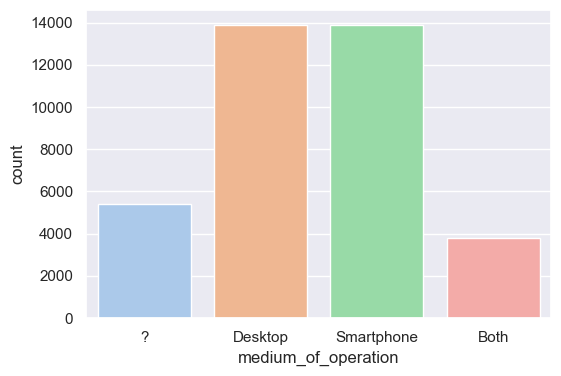

In [27]:
sns.set(rc = {'figure.figsize':(6, 4)})
color = sns.color_palette("pastel")
sns.countplot(x = data['medium_of_operation'], data = data, palette = color)

In [28]:
# internet_option (Shows the type of internet service the customer is using)
print(f"Missing values: {data['internet_option'].isnull().sum()}")
print(f"Unique values: {data['internet_option'].unique().tolist()}\n")
print(data['internet_option'].value_counts())

Missing values: 0
Unique values: ['Wi-Fi', 'Mobile_Data', 'Fiber_Optic']

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64


<Axes: xlabel='internet_option', ylabel='count'>

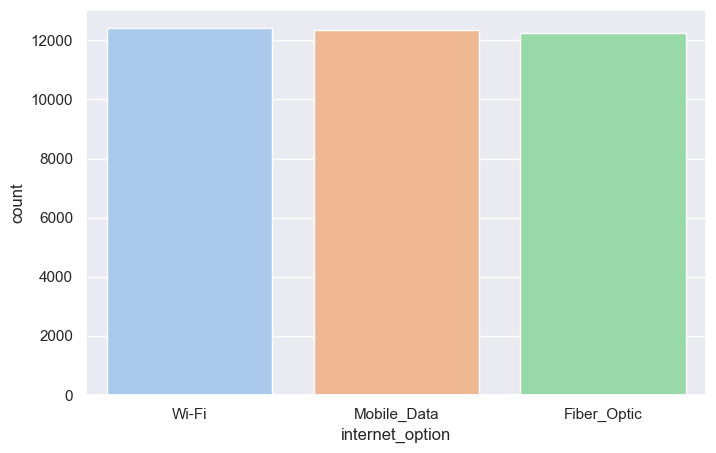

In [29]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data['internet_option'], data = data, palette="pastel")

<Axes: xlabel='internet_option', ylabel='count'>

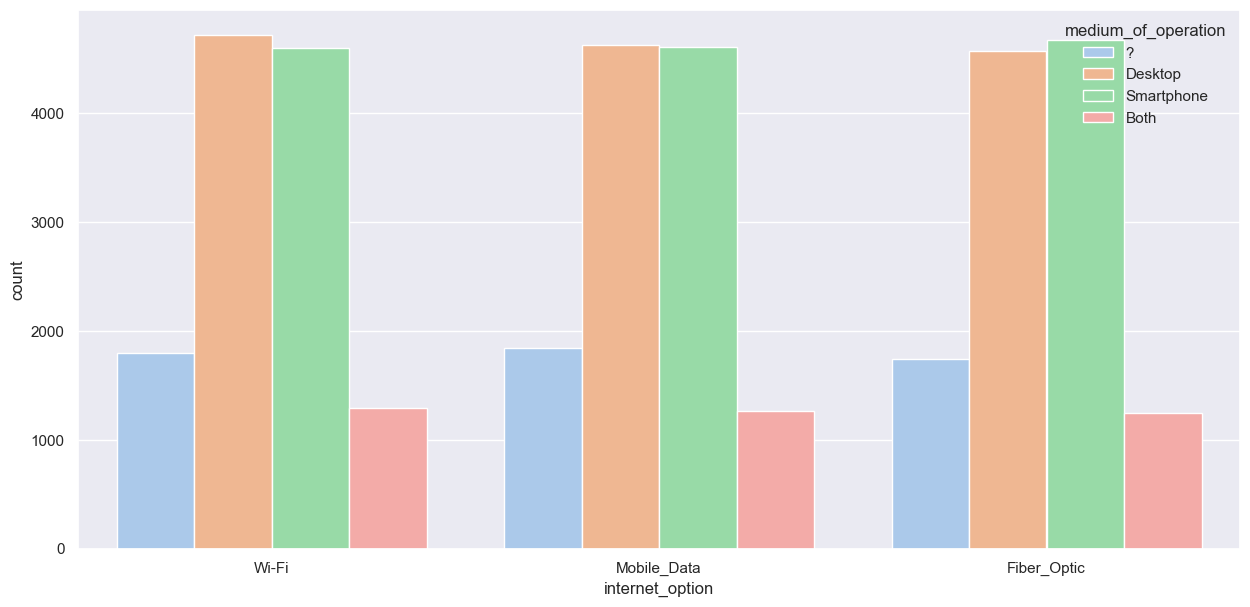

In [30]:
plt.figure(figsize = (15, 7))
sns.countplot(x = data["internet_option"], hue = data["medium_of_operation"], palette="pastel")


- Most people have '__internet_option__' = __'Wi-Fi'__ have '__medium_of_operation__' = __'Desktop'__, so replace __?__ with __ Desktop __ in the Table.

- Most people have '__internet_option__' = __'Fiber_Optic'__ have '__medium_of_operation__' = __'Smartphone'__, so replace __?__ with __ Smartphone __ in the Table.

- Most people have '__internet_option__' = __'Mobile_Data'__ have '__medium_of_operation__' = __'Smartphone'__, so replace __?__ with __ Smartphone __ in the Table.

<Axes: >

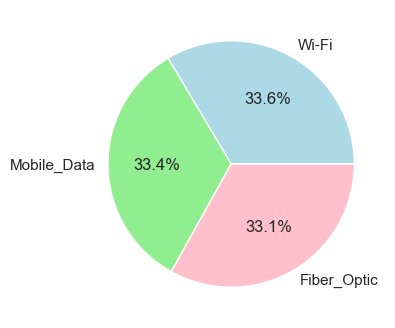

In [31]:
data['internet_option'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "", figsize = (6, 4), colors = ['lightblue', 'lightgreen', 'pink'])   

In [32]:
# last_visit_time (represents the time the customer last accessed the service)
print(f"Missing values: {data['last_visit_time'].isnull().sum()}")
print(f"Unique values: {data['last_visit_time'].nunique()}")

Missing values: 0
Unique values: 30101


In [33]:
# days_since_last_login (displays the number of days since the customer last accessed the service)
print(f"Missing values: {data['days_since_last_login'].isnull().sum()}")
print(f"Unique values: { sorted(data['days_since_last_login'].unique().tolist())}")

Missing values: 0
Unique values: [-999, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


Although this '__days_since_last_login__' column does not have missing data, it does have the data '-999', which for the number of days since the date must be a positive number, so fields with the value '-999' must be handled.

<Axes: xlabel='days_since_last_login', ylabel='count'>

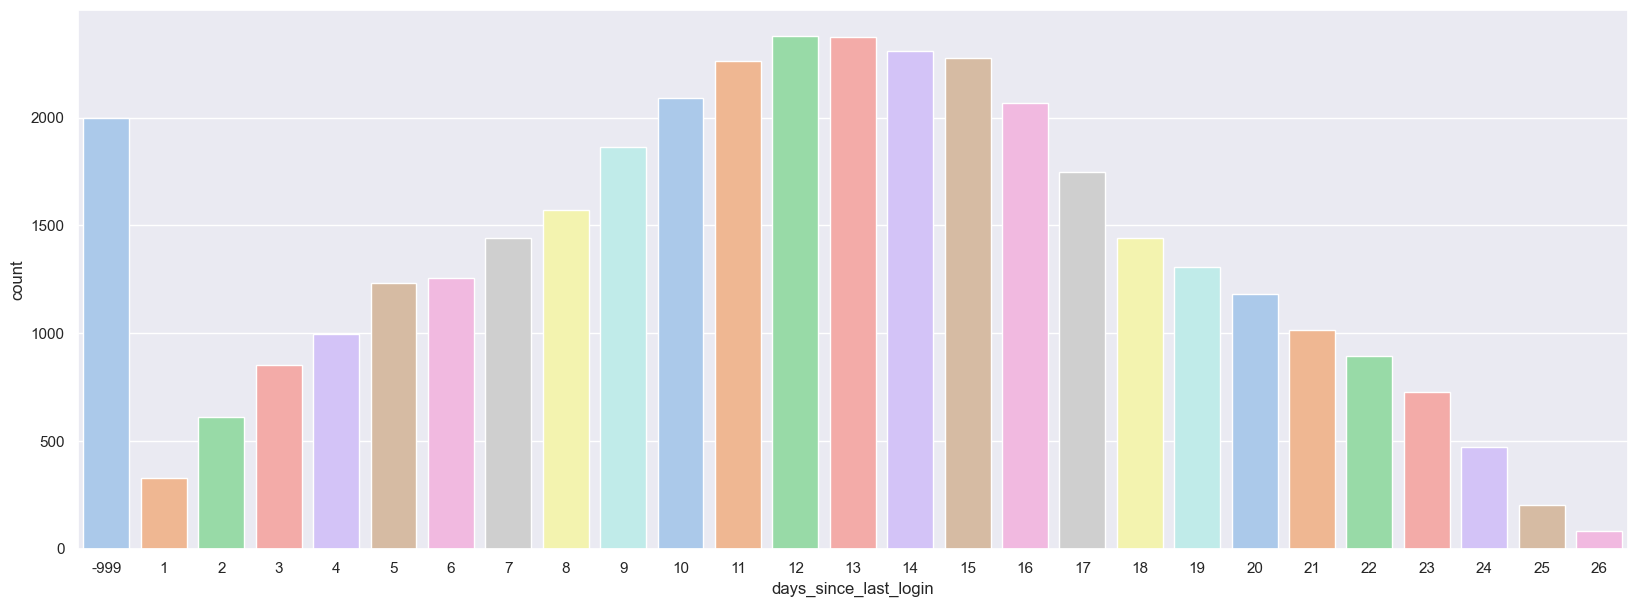

In [34]:
sns.set(rc = {'figure.figsize':(20, 7)})
sns.countplot(x = data['days_since_last_login'], data = data, palette = "pastel")

In [35]:
data.loc[data['days_since_last_login'] < 0].shape[0]

1999

In [36]:
# avg_time_spent (represents the average time a customer spends using the service)
print(f"Missing values: {data['avg_time_spent'].isnull().sum()}")
print(f"Unique values: {data['avg_time_spent'].nunique()}")

Missing values: 0
Unique values: 25961


<Axes: xlabel='avg_time_spent', ylabel='Count'>

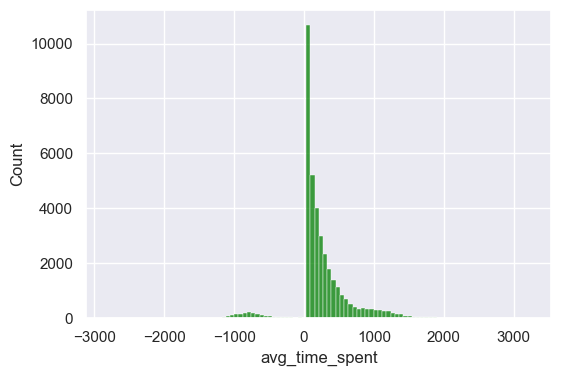

In [37]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.histplot(x = data['avg_time_spent'], data = data, bins = 100, color = "green")

'__avg_time_spent__' has negative values so these negative data can be considered missing values.__

In [38]:
len(data['avg_time_spent'][data['avg_time_spent'] < 0])

1719

'__avg_time_spent__' has 1719 missing values

In [39]:
# avg_transaction_value (represents the average transaction value of customers)
print(f"Missing values: {data['avg_transaction_value'].isnull().sum()}")
print(f"Unique values: {data['avg_transaction_value'].nunique()}")

Missing values: 0
Unique values: 36894


<Axes: xlabel='avg_transaction_value', ylabel='Density'>

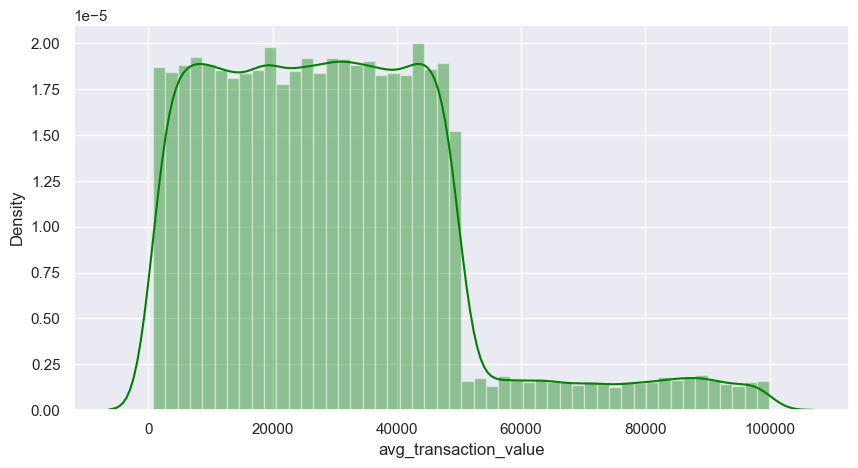

In [40]:
plt.figure(figsize = (10, 5))
sns.distplot(data['avg_transaction_value'], bins = 50, color = "green")

In [41]:
# avg_frequency_login_days represents the average customer login frequency.
print(f"Missing values: {data['avg_frequency_login_days'].isnull().sum()}")
print(f"Unique values: {data['avg_frequency_login_days'].nunique()}")

Missing values: 0
Unique values: 1654


In [42]:
data['avg_frequency_login_days'].unique()

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

'__avg_frequency_login_days__' has negative values so we can consider these negative data as missing values

In [43]:
len(data['avg_frequency_login_days'][data['avg_frequency_login_days'] == 'Error'])

3522

Furthermore, in the column '__avg_frequency_login_days__' there are 3522 __Error__ values, so we can consider that the __Error__ value is a missing value

<Axes: xlabel='avg_frequency_login_days', ylabel='Density'>

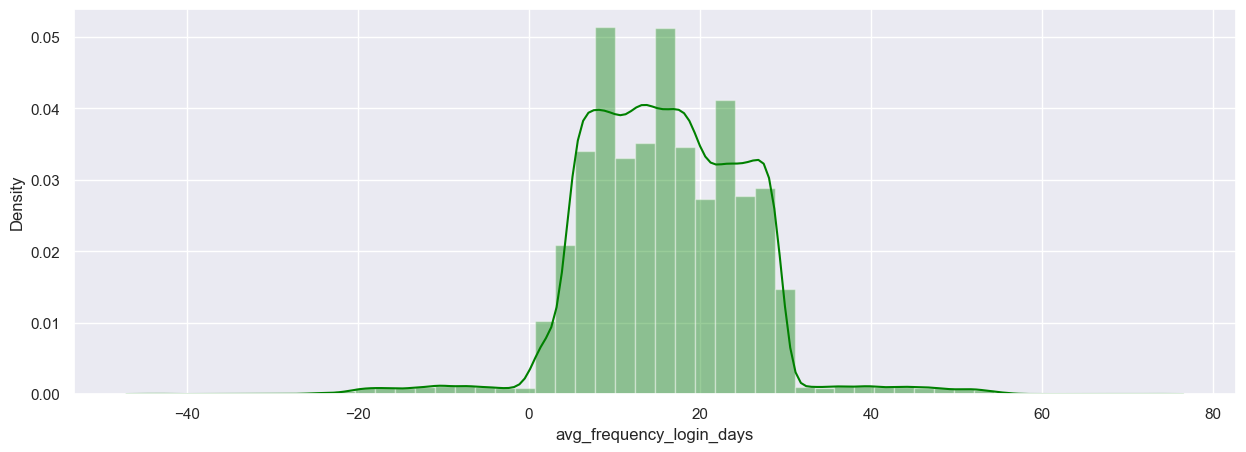

In [44]:
plt.figure(figsize = (15, 5))
sns.distplot(a = data['avg_frequency_login_days'][data['avg_frequency_login_days'] != 'Error'], bins = 50, color = "green")

In [45]:
# points_in_wallet (represents the customer's score per transaction)
print(f"Missing values: {data['points_in_wallet'].isnull().sum()}")
print(f"Unique values: {data['points_in_wallet'].nunique()}")

Missing values: 3443
Unique values: 23699


In [46]:
len(data['points_in_wallet'][data['points_in_wallet'] < 0])

136

The '__points_in_wallet__' column also contains negative values, so these negative data can be considered missing values.

<Axes: xlabel='points_in_wallet', ylabel='Density'>

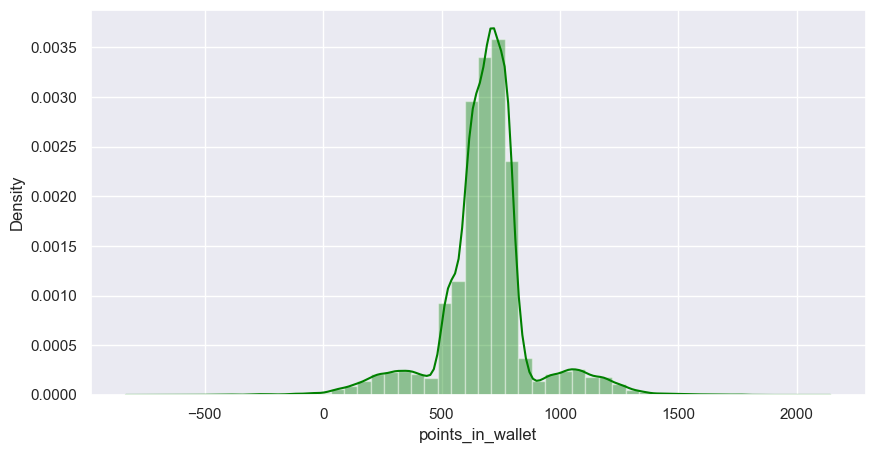

In [47]:
plt.figure(figsize = (10, 5))
sns.distplot(a = data['points_in_wallet'], bins = 50, color = "green")

In [48]:
# used_special_discount (represents whether the customer has used special discounts
print(f"Missing values: {data['used_special_discount'].isnull().sum()}")
print(f"Unique values: {data['used_special_discount'].unique().tolist()}\n")
print(data['used_special_discount'].value_counts())

Missing values: 0
Unique values: ['Yes', 'No']

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64


In [49]:
# offer_application_preference (represents whether customers like offers or not)
print(f"Missing values: {data['offer_application_preference'].isnull().sum()}")
print(f"Unique values: {data['offer_application_preference'].unique().tolist()}\n")
print(data['offer_application_preference'].value_counts())

Missing values: 0
Unique values: ['Yes', 'No']

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64


In [50]:
#past_complaint (represents whether the customer has made any complaints in the past)
print(f"Missing values: {data['past_complaint'].isnull().sum()}")
print(f"Unique values: {data['past_complaint'].unique().tolist()}\n")
print(data['past_complaint'].value_counts())

Missing values: 0
Unique values: ['No', 'Yes']

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64


In [51]:
# complaint status (shows whether customer complaints have been resolved or not)
print(f"Missing values: {data['complaint_status'].isnull().sum()}")
print(f"Unique values: {data['complaint_status'].unique().tolist()}\n")
print(data['complaint_status'].value_counts())

Missing values: 0
Unique values: ['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved', 'No Information Available']

complaint_status
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: count, dtype: int64


<Axes: xlabel='complaint_status', ylabel='count'>

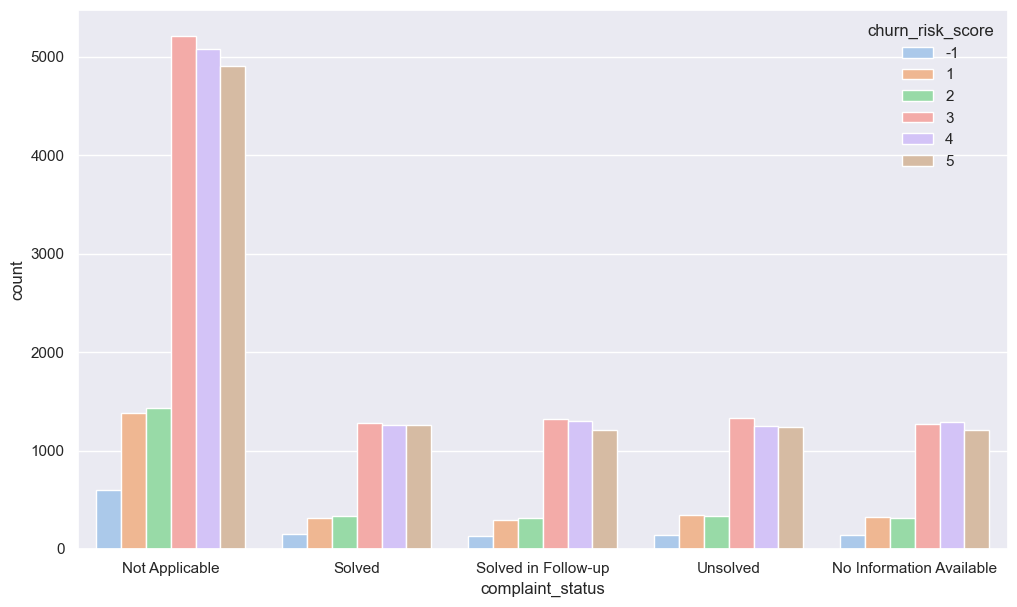

In [52]:
plt.figure(figsize = (12, 7))
sns.countplot(x = data['complaint_status'], hue = data["churn_risk_score"], palette = "pastel")

Risk score from 3 to 5 in __Not Applicable__ state is much higher than other states

In [53]:
# feedback (represents the feedback provided by customers)
print(f"Missing values: {data['feedback'].isnull().sum()}")
print(f"Unique values: {data['feedback'].unique().tolist()}\n")
print(data['feedback'].value_counts())

Missing values: 0
Unique values: ['Products always in Stock', 'Quality Customer Care', 'Poor Website', 'No reason specified', 'Poor Product Quality', 'Poor Customer Service', 'Too many ads', 'User Friendly Website', 'Reasonable Price']

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64


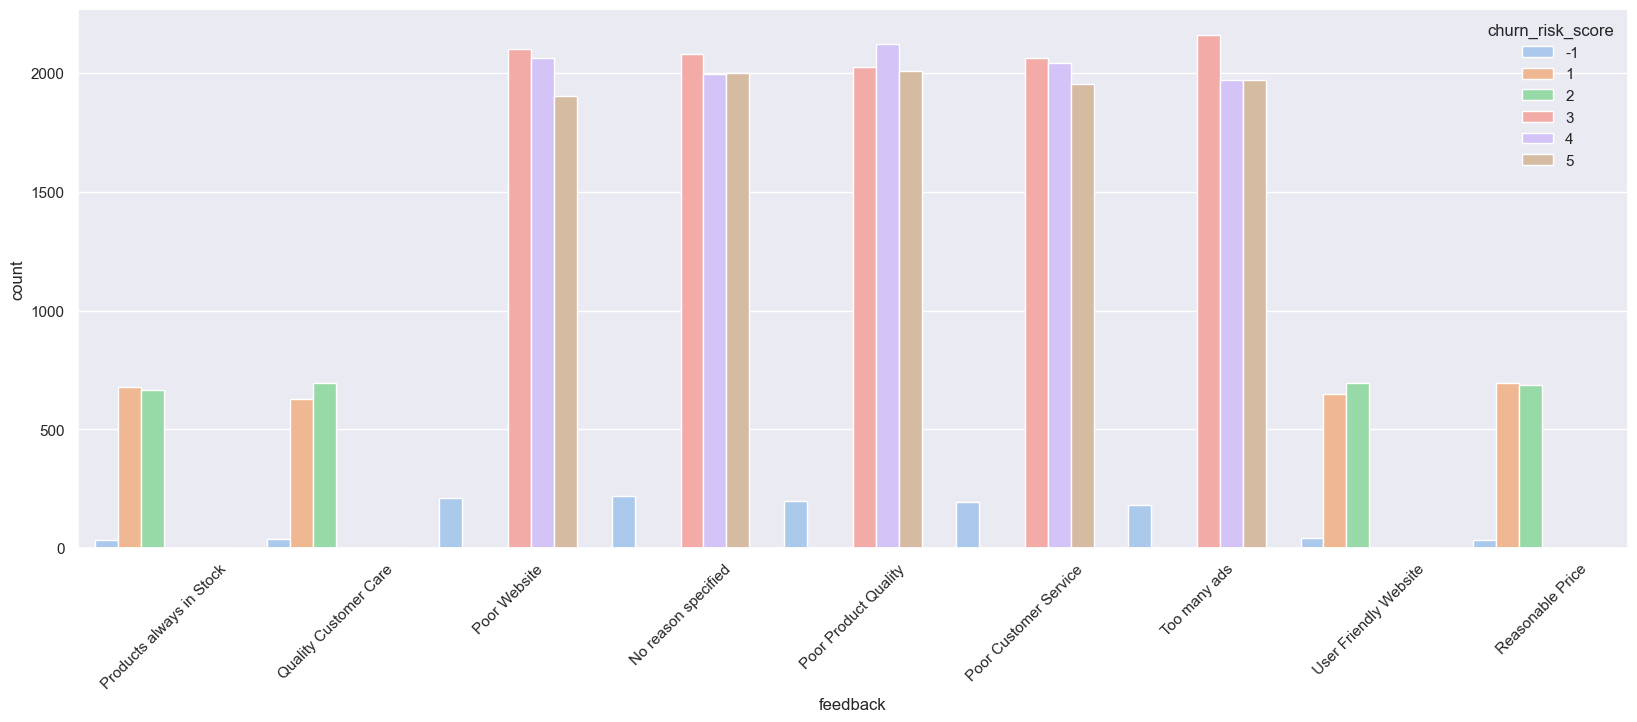

In [54]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['feedback'], hue = data['churn_risk_score'], palette = "pastel")
plt.xticks(rotation = 45)
plt.show()

In [55]:
# churn_risk_score (represents customer churn risk)
display(data['churn_risk_score'].unique().tolist())
display(data['churn_risk_score'].value_counts())

[2, 1, 5, 3, 4, -1]

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

<Axes: xlabel='churn_risk_score', ylabel='count'>

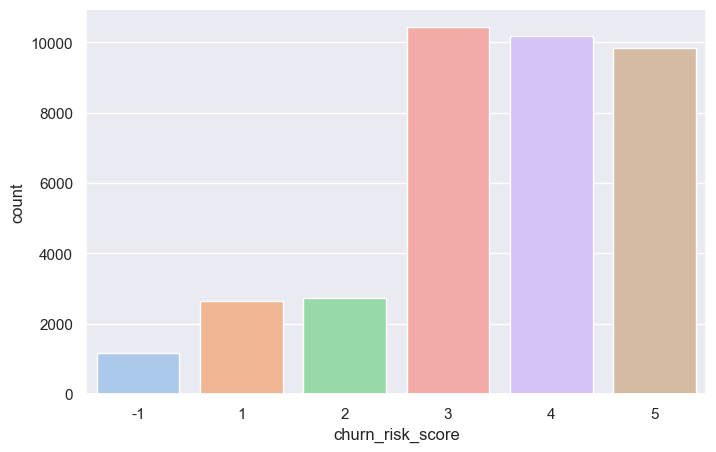

In [56]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['churn_risk_score'], data = data, palette = "pastel")

Negative churn is when current customers are spending so much more money (services, upgrades, and add-ons) that the amount of money lost due to customer churn is offset by that amount, then churn rate will have a negative value. But considering churn rate values from 1 to 5, values -1 will be removed from the data set.

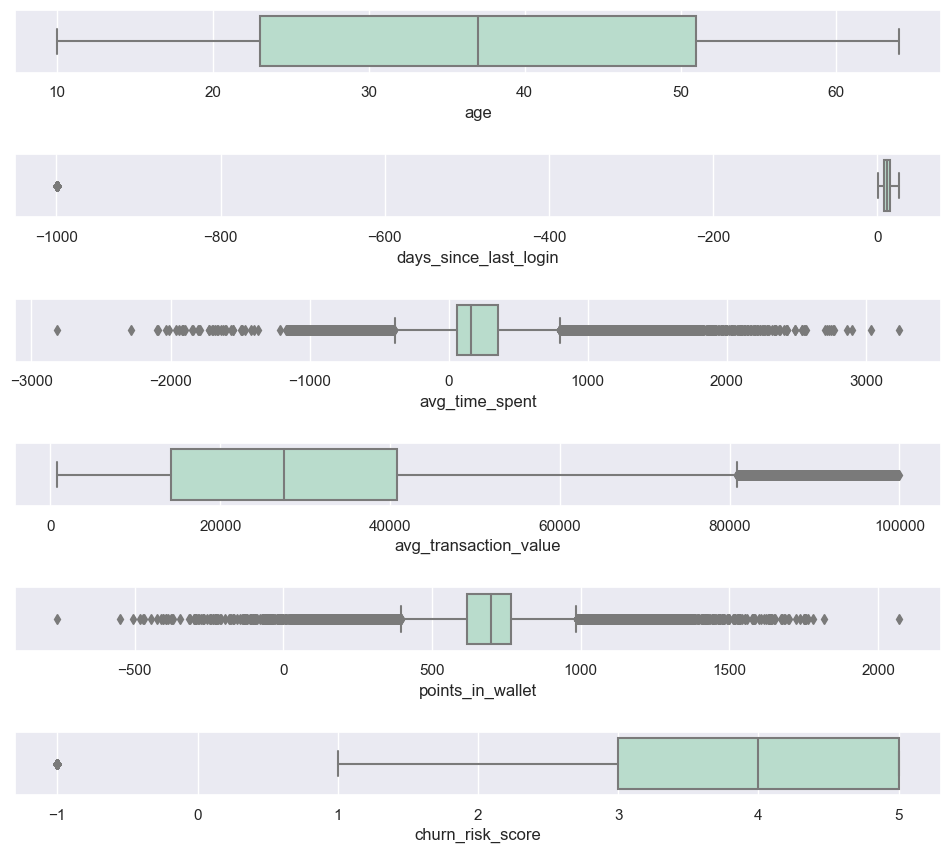

In [57]:
# Box plot
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(10, 1.5*len(numerical_cols)),sharex=False,sharey=False)
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=data,palette='Pastel2',ax=axes[i])
plt.tight_layout(pad=2.0)

Values that do not fall within the percentile range of the data column should be considered ouliers that need to be processed

# Data Preprocessing

In [58]:
# Fill missing value but still keep the distribution of the data column intact
def fill_missing_with_distribution(df, column):
    value_counts = df[column].value_counts(normalize=True)
    missing_indices = df[column].isnull()
    missing_count = missing_indices.sum()

    values = value_counts.index
    distribution = value_counts.values

    fill_values = np.random.choice(values, size=missing_count, p=distribution, replace=True)
    df.loc[missing_indices, column] = fill_values

In [59]:
def preprocessing_data(data):
    df = data.copy()

    # Use the name to fill in the unknown values of the gender column.
    for x in df['Name'][df['gender'] == 'Unknown']:
      firstnames = [x.split(' ')[0]]
      fill_values = df['gender'][df['Name'].str.split().str[0].isin(firstnames)].value_counts().idxmax()
      df['gender'][df['Name']== x] = fill_values

    # Change the characters '?' into the most used type of internet options.
    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Wi-Fi')
    df['medium_of_operation'] = np.where((condt), 'Smartphone', df['medium_of_operation'])

    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Fiber_Optic')
    df['medium_of_operation'] = np.where((condt), 'Desktop', df['medium_of_operation'])

    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Mobile_Data')
    df['medium_of_operation'] = np.where((condt), 'Smartphone', df['medium_of_operation'])

    # Remove columns that are not related to model training
    drop_cols = ['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time']
    df.drop(columns = drop_cols, axis = 1, inplace = True)

    # Perform replacement of unusual values to NaN
    df["avg_frequency_login_days"] = df["avg_frequency_login_days"].replace("Error", np.NaN)
    df["days_since_last_login"] = df["days_since_last_login"].replace(-999, np.NaN)
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)
    df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] < 0, np.nan, df['avg_frequency_login_days'])
    df['joined_through_referral'] = df['joined_through_referral'].replace("?", np.NaN)

    # Handle the NaN values of the two columns 'joined_through_referral' and 'preferred_offer_types' while keeping the distribution intact.
    fill_missing_with_distribution(data, 'joined_through_referral')
    fill_missing_with_distribution(data, 'preferred_offer_types')

    # Performs conversion of negative values into positive values
    df["avg_time_spent"]= df["avg_time_spent"].abs()
    df["points_in_wallet"]= df["points_in_wallet"].abs()

    # Remove data fields with 'churn_risk_score' = -1
    df = df[df['churn_risk_score'] != -1]

    # Handle NaN values
    # If that column has a numeric data type, replace NaN with median
    # If that column has a data type other than numeric data, replace NaN with mode
    for col in df.columns:
        if df[col].dtype != 'O' and df[col].isnull().sum() > 0:
            df[col].replace([np.nan], df[col].median(), inplace = True)
        elif df[col].dtype == 'O' and df[col].isnull().sum() > 0:
            df[col].replace([np.nan], df[col].mode()[0], inplace = True)

    return df

In [60]:
df = preprocessing_data(data)
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,697.83,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  object 
 2   region_category               35829 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joined_through_referral       35829 non-null  object 
 5   preferred_offer_types         35829 non-null  object 
 6   medium_of_operation           35829 non-null  object 
 7   internet_option               35829 non-null  object 
 8   days_since_last_login         35829 non-null  float64
 9   avg_time_spent                35829 non-null  float64
 10  avg_transaction_value         35829 non-null  float64
 11  avg_frequency_login_days      35829 non-null  float64
 12  points_in_wallet              35829 non-null  float64
 13  used_s

In [62]:
df.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

# Feature Engineering

In [63]:
new_categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
new_numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"Categorical features:\n{new_categorical_cols}")
print(f"Numerical features:\n{new_numerical_cols}")

Categorical features:
['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical features:
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


In [64]:
def apply_feature_engineering(data):
    df = data.copy()
    #Label encoding
    df["gender"] = df["gender"].astype("category").cat.codes
    df["joined_through_referral"] = df["joined_through_referral"].astype("category").cat.codes
    df["offer_application_preference"] = df["offer_application_preference"].astype("category").cat.codes
    df["used_special_discount"] = df["used_special_discount"].astype("category").cat.codes
    df["past_complaint"] = df["joined_through_referral"].astype("category").cat.codes
    #Onehot encoding
    df = pd.get_dummies(df, columns = ['region_category','membership_category','preferred_offer_types',
                                       'medium_of_operation','internet_option','complaint_status','feedback'])
    #Encode label [1,2,3,4,5] -> [0,1,2,3,4]
    df['churn_risk_score'] = df["churn_risk_score"].astype("category").cat.codes
    return df


In [65]:
df = apply_feature_engineering(df)
df.shape

(35829, 44)

In [66]:
df.head()

,age,gender,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,0,0,17.0,300.63,53005.25,17.0,781.75,1,1,...,False,False,False,False,False,True,False,False,False,False
1,32,0,0,16.0,306.34,12838.38,10.0,697.83,1,0,...,False,False,False,False,False,False,True,False,False,False
2,44,0,1,14.0,516.16,21027.00,22.0,500.69,0,1,...,False,False,False,False,True,False,False,False,False,False
3,37,1,1,11.0,53.27,25239.56,6.0,567.66,0,1,...,True,False,False,False,True,False,False,False,False,False
4,31,0,0,20.0,113.13,24483.66,16.0,663.06,0,1,...,False,False,False,False,True,False,False,False,False,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 36991
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             35829 non-null  int64  
 1   gender                                          35829 non-null  int8   
 2   joined_through_referral                         35829 non-null  int8   
 3   days_since_last_login                           35829 non-null  float64
 4   avg_time_spent                                  35829 non-null  float64
 5   avg_transaction_value                           35829 non-null  float64
 6   avg_frequency_login_days                        35829 non-null  float64
 7   points_in_wallet                                35829 non-null  float64
 8   used_special_discount                           35829 non-null  int8   
 9   offer_application_preference                

<Axes: >

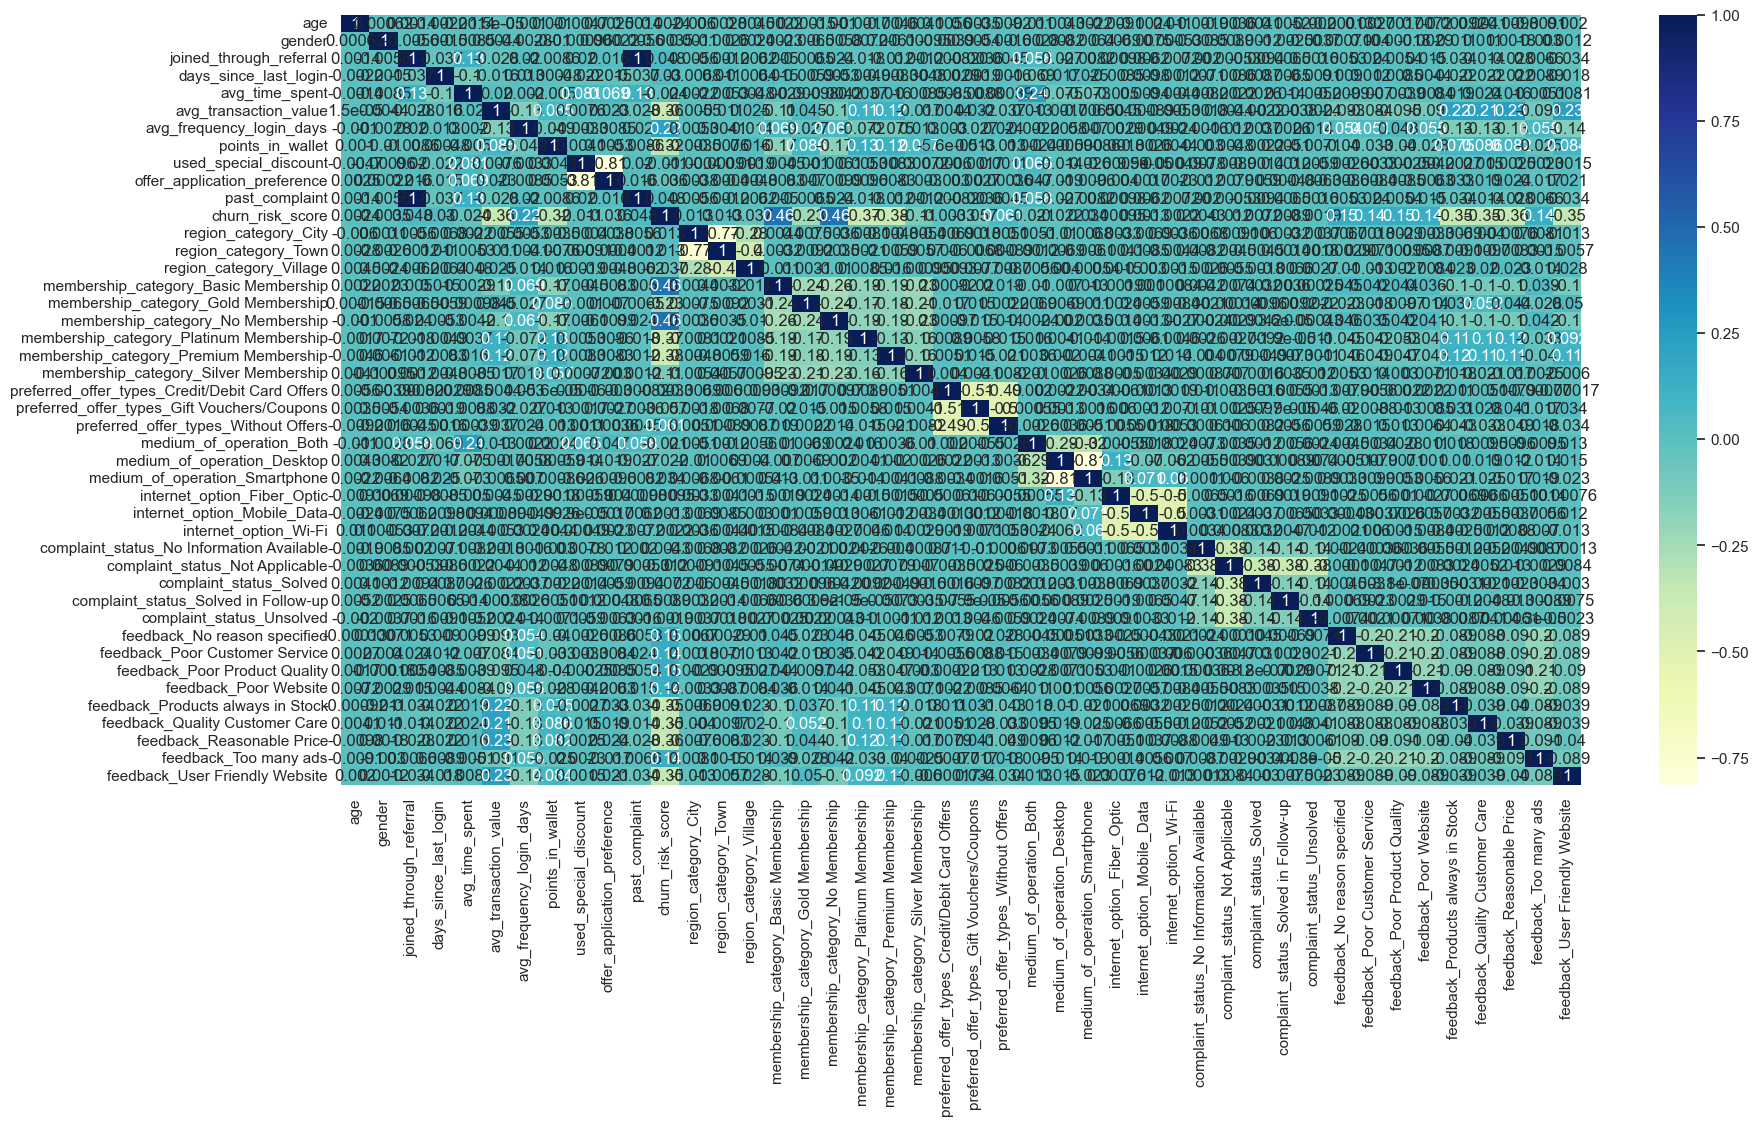

In [68]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), cmap="Greens", annot = True)

In [69]:
def prepare_X_y(df):
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")
    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y

In [70]:
X, y = prepare_X_y(df)

In [71]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Use SelectFromModel for feature selection
selector = SelectFromModel(estimator=classifier, threshold= 0.01)
X_selected = selector.fit_transform(X, y)

# Get the support mask indicating selected features
feature_mask = selector.get_support()

# Extract the selected features from the original feature matrix
X_selected_original = X[:, feature_mask]
X_selected_original.shape

(35829, 16)

# Apply machine learning model

## Train-test split

In [72]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.8

trainX, testX, trainY, testY = train_test_split(X_selected_original, y, train_size = TRAIN_SIZE, random_state = RANDOM_STATE, stratify = y )

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state = RANDOM_STATE)
trainX, trainY = sm.fit_resample(trainX, trainY)

under = RandomUnderSampler()
trainX, trainY = under.fit_resample(trainX, trainY)

## Build Model

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [75]:
class_weights = dict()
for label in set(y):
  class_weights[label] = len(y) / (len(set(y)) * list(y).count(label))

In [76]:
def build_model_SVC(X, y):
    pipe = Pipeline(steps = [("scaler", RobustScaler(quantile_range = (25.0, 75.0))), ("svc", SVC(class_weight = class_weights))])
    pipe.fit(X, y)
    return pipe

In [77]:
def build_model_treeclf(X, y, clf):
    pipe = Pipeline(steps = [("scaler", RobustScaler()), ("clf", clf)])
    param_grid = {
        'scaler__quantile_range': [(25.0, 75.0), (5.0, 95.0), (10.0, 90.0), (1.0, 99.0)],
        'clf__criterion': ["gini", "entropy", "log_loss"],
        'clf__max_depth': [None, 2, 3, 5, 10, 20],
        'clf__min_samples_split': [2, 3, 5, 7, 10, 12]
    }
    model = GridSearchCV(pipe, param_grid, n_jobs = -1)
    model.fit(X, y)
    return model

In [78]:
def build_model_boostclf(X, y, clf):
    pipe = Pipeline(steps = [("scaler", RobustScaler()), ("clf", clf)])
    param_grid = {
        'scaler__quantile_range': [(25.0, 75.0), (5.0, 95.0), (10.0, 90.0), (1.0, 99.0)],
        'clf__n_estimators': [50, 100, 150, 200],
        'clf__max_depth': [2, 3, 5, 7, 10, 20],
        'clf__learning_rate': [0.001, 0.01, 0.02, 0.03, 0.1]
    }
    model = GridSearchCV(pipe, param_grid, n_jobs = -1)
    model.fit(X, y)
    return model

## Measure Performance

In [79]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def calculate_performance(y_true, y_pred):
    average_values = 'micro'
    print("Precision: ", precision_score(y_true, y_pred, average = average_values))
    main_score = recall_score(y_true, y_pred, average = average_values)
    print("Recall: ", main_score)
    print("F1: ", f1_score(y_true , y_pred, average = average_values))
    print("-" * 100)
    label = [1, 2, 3, 4, 5]
    print("Classification report: \n", classification_report(y_true , y_pred))

    sns.set(rc = {'figure.figsize':(8, 5)})
    sns.heatmap(confusion_matrix(y_true , y_pred), annot = True, cmap= 'YlGnBu', fmt = '.0f', xticklabels = label, yticklabels = label)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title('Confusion Matrix')
    plt.show()
    return main_score

### Support Vector Machine

In [80]:
svc = build_model_SVC(trainX, trainY)

Precision:  0.7830195467082384
Recall:  0.7830195467082384
F1:  0.7830195467082384
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      8339
           1       0.85      0.75      0.79      8339
           2       0.91      0.90      0.90      8339
           3       0.80      0.41      0.54      8339
           4       0.67      1.00      0.80      8339

    accuracy                           0.78     41695
   macro avg       0.80      0.78      0.77     41695
weighted avg       0.80      0.78      0.77     41695



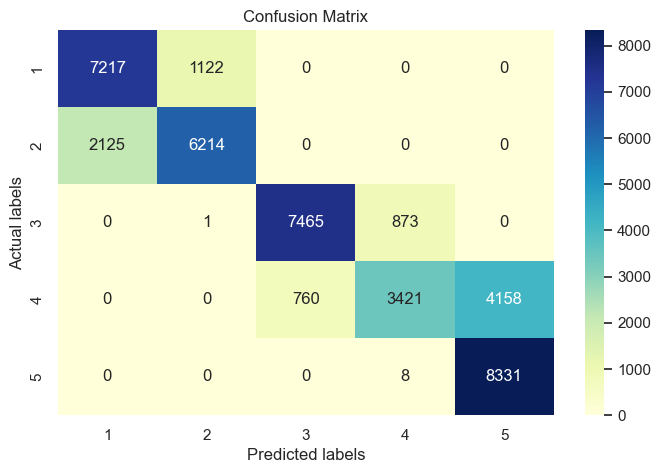

Recall of Train:  0.7830195467082384


In [81]:
pred = svc.predict(trainX)
print("Recall of Train: ", calculate_performance(trainY, pred))

Precision:  0.7573262629081775
Recall:  0.7573262629081775
F1:  0.7573262629081775
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.76      0.72       530
           1       0.74      0.64      0.69       548
           2       0.91      0.90      0.90      2085
           3       0.80      0.41      0.54      2037
           4       0.66      1.00      0.80      1966

    accuracy                           0.76      7166
   macro avg       0.75      0.74      0.73      7166
weighted avg       0.78      0.76      0.74      7166



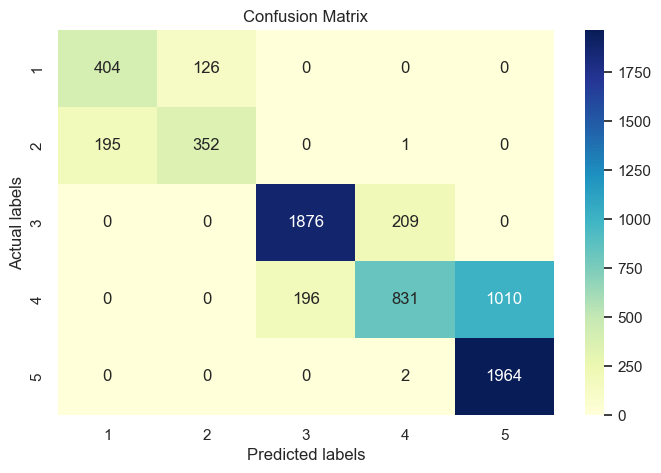

Recall of Test:  0.7573262629081775


In [82]:
pred = svc.predict(testX)
print("Recall of Test: ",calculate_performance(testY, pred))

### Decision Tree

In [83]:
model = build_model_treeclf(trainX, trainY, DecisionTreeClassifier())
print("Best parameter (CV score = %0.3f):\n" % model.best_score_)
print(model.best_params_)

Best parameter (CV score = 0.797):

{'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_split': 2, 'scaler__quantile_range': (1.0, 99.0)}


Precision:  0.9178558580165488
Recall:  0.9178558580165488
F1:  0.9178558580165488
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8339
           1       0.99      0.99      0.99      8339
           2       0.94      0.98      0.96      8339
           3       0.86      0.72      0.79      8339
           4       0.81      0.91      0.86      8339

    accuracy                           0.92     41695
   macro avg       0.92      0.92      0.92     41695
weighted avg       0.92      0.92      0.92     41695



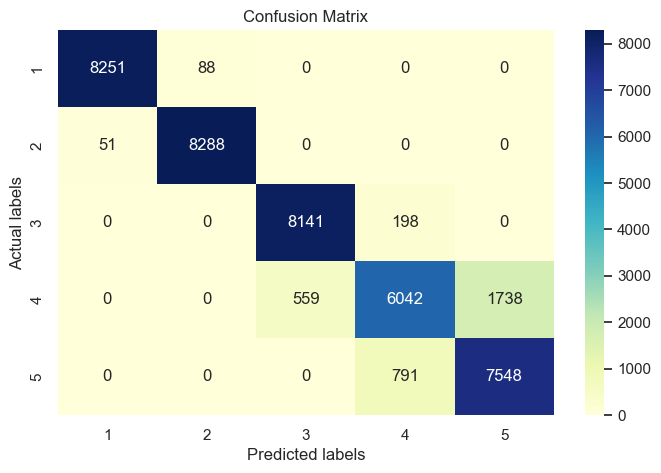

Recall of Train:  0.9178558580165488


In [84]:
pred = model.predict(trainX)
print("Recall of Train: ", calculate_performance(trainY, pred))

Precision:  0.7737929109684621
Recall:  0.7737929109684621
F1:  0.7737929109684621
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       530
           1       0.73      0.71      0.72       548
           2       0.89      0.94      0.91      2085
           3       0.72      0.59      0.64      2037
           4       0.73      0.83      0.78      1966

    accuracy                           0.77      7166
   macro avg       0.75      0.76      0.75      7166
weighted avg       0.77      0.77      0.77      7166



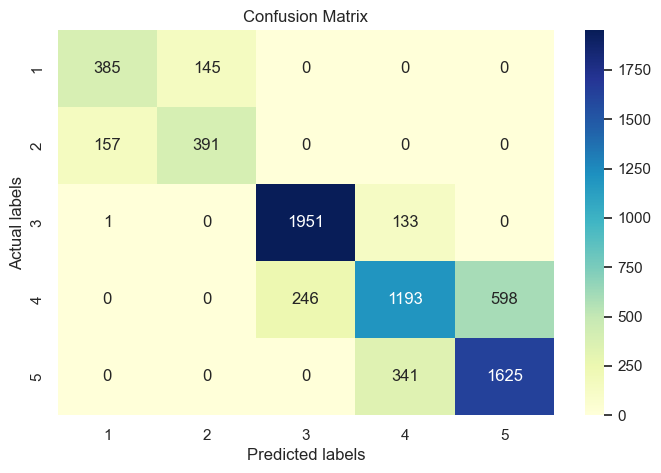

Recall of Test:  0.7737929109684621


In [85]:
pred = model.predict(testX)
print("Recall of Test: ", calculate_performance(testY, pred))